In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/google-dataset/goog.csv


In [2]:
df=pd.read_csv("/kaggle/input/google-dataset/goog.csv")

In [3]:
df

,Date,Open,High,Low,Close,Volume
0,12/19/2016,790.219971,797.659973,786.270020,794.200012,1225900
1,12/20/2016,796.760010,798.650024,793.270020,796.419983,925100
2,12/21/2016,795.840027,796.676025,787.099976,794.559998,1208700
3,12/22/2016,792.359985,793.320007,788.580017,791.260010,969100
4,12/23/2016,790.900024,792.739990,787.280029,789.909973,623400
...,...,...,...,...,...,...
56,3/13/2017,844.000000,848.684998,843.250000,845.539978,1149500
57,3/14/2017,843.640015,847.239990,840.799988,845.619995,779900
58,3/15/2017,847.590027,848.630005,840.770020,847.200012,1379600
59,3/16/2017,849.030029,850.849976,846.130005,848.780029,970400


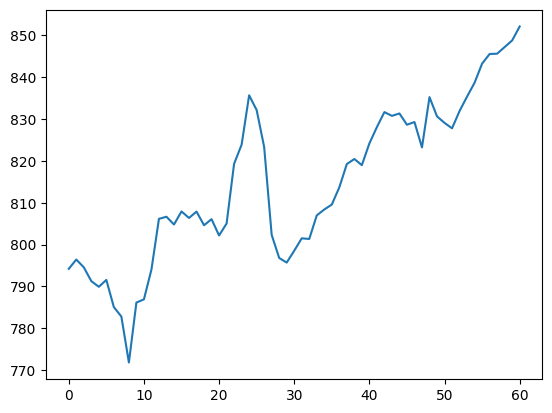

In [4]:
import matplotlib.pyplot as plt
plt.plot(df['Close'])

In [5]:
df['Close']

0     794.200012
1     796.419983
2     794.559998
3     791.260010
4     789.909973
         ...    
56    845.539978
57    845.619995
58    847.200012
59    848.780029
60    852.119995
Name: Close, Length: 61, dtype: float64

In [7]:
size=int(len(df['Close']))
size

61

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler=MinMaxScaler()
scaled=scaler.fit_transform(df['Close'].values.reshape(-1,1))


In [11]:
scaled

array([[0.27870496],
       [0.30635093],
       [0.28318798],
       [0.24209223],
       [0.22527981],
       [0.24570341],
       [0.16475695],
       [0.13661236],
       [0.        ],
       [0.17833138],
       [0.18779601],
       [0.27646347],
       [0.42752207],
       [0.43374872],
       [0.41058501],
       [0.44943925],
       [0.43013678],
       [0.44906604],
       [0.4083435 ],
       [0.42652559],
       [0.37801975],
       [0.41344979],
       [0.5914072 ],
       [0.64819422],
       [0.79514303],
       [0.75130792],
       [0.64122041],
       [0.37982571],
       [0.31095859],
       [0.29732258],
       [0.33262797],
       [0.36948926],
       [0.36762172],
       [0.43773312],
       [0.4552927 ],
       [0.4699875 ],
       [0.52117039],
       [0.59053537],
       [0.60560414],
       [0.58729739],
       [0.6518054 ],
       [0.70049824],
       [0.74520517],
       [0.73399766],
       [0.74109613],
       [0.70759672],
       [0.71556701],
       [0.639

In [12]:
train=scaled[:int(0.8*len(scaled))]
test=scaled[int(0.8*len(scaled)):]

In [15]:
len(test)

13

In [20]:
import numpy as np
def create_dataset(data):
    X=[]
    Y=[]
    for i in range (len(data)-4):
        X.append(data[i:i+4,0])
        Y.append(data[i+4,0])
    return np.array(X),np.array(Y)

In [21]:
X_train,Y_train=create_dataset(train)
X_test,Y_test=create_dataset(test)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense

2025-05-06 09:55:58.552453: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746525358.785496      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746525358.853375      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [23]:
model=Sequential()

In [26]:
model.add(LSTM(50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(50))
model.add(Dense(1,activation='linear'))          

2025-05-06 09:57:31.081102: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
model.compile(optimizer='adam',loss='mae',metrics=['mae','mse'])

In [28]:
model.fit(X_train,Y_train)

2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.4409 - mae: 0.4409 - mse: 0.2290


In [29]:
model.evaluate(X_test,Y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step - loss: 0.8178 - mae: 0.8178 - mse: 0.6740


[0.8177989721298218, 0.8177989721298218, 0.6740372776985168]

In [30]:
y_pred=model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


In [31]:
y_pred=scaler.inverse_transform(y_pred)

In [44]:
y_pred+=[50]

In [36]:
Y_test=scaler.inverse_transform(np.array(Y_test).reshape(-1,1))

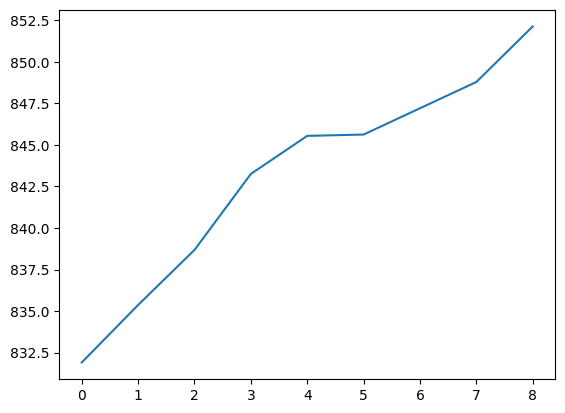

In [42]:

plt.plot(Y_test)

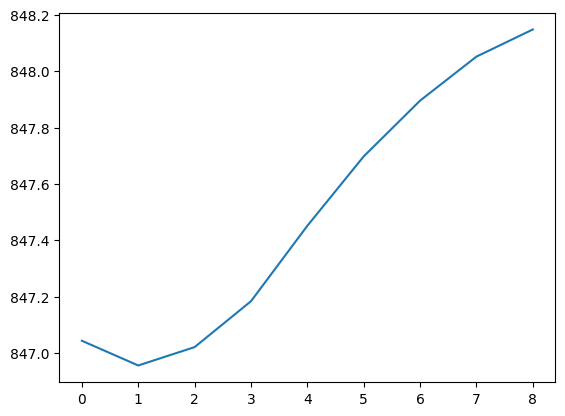

In [45]:
plt.plot(y_pred)